# Tutoriel complet Regression linaire

## Collect data using pandas

In [ ]:
# modules nécessaires pour le notebook
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# lire le fichier de données
#utiliser le param index_col: Column to use as the row labels of the DataFrame
df = pd.read_csv('Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# identification des descripteurs, cible et observations

Quels sont les descripteurs? On a 3 descripteurs dans ce dataset qui sont:

* TV
* Radio
* Newspaper

Quelle est la cible?

* Sales: vente d'un produit

Quelle est la forme ou shape du dataframe?

In [ ]:
df.shape

(200, 4)

On voit que l'on a 200 observations avec 4 colonnes dont 3 sont des descripteurs

# Tracé des relations entre les descripteurs et la cible

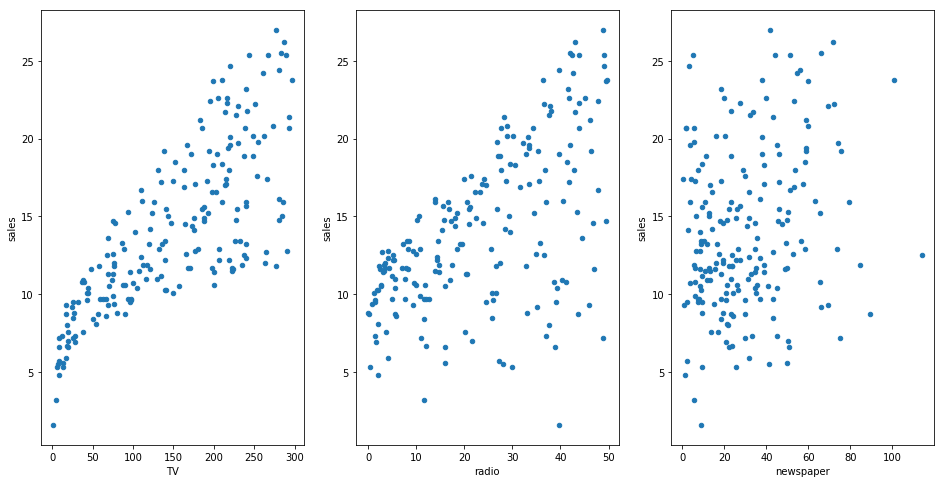

In [ ]:
#utilisation d'une figure avec 3 plots aligné sur une ligne
fig, axes = plt.subplots(1,3,sharey=False)
df.plot(kind='scatter', x='TV', y='sales', ax=axes[0], figsize=(16,8))
df.plot(kind='scatter', x='radio', y='sales', ax=axes[1], figsize=(16,8))
df.plot(kind='scatter', x='newspaper', y='sales', ax=axes[2], figsize=(16,8))

On voit au niveau des graphes qu'il existe une certaine relation linéaire entre TV et Sales ainsi que radio et Sales

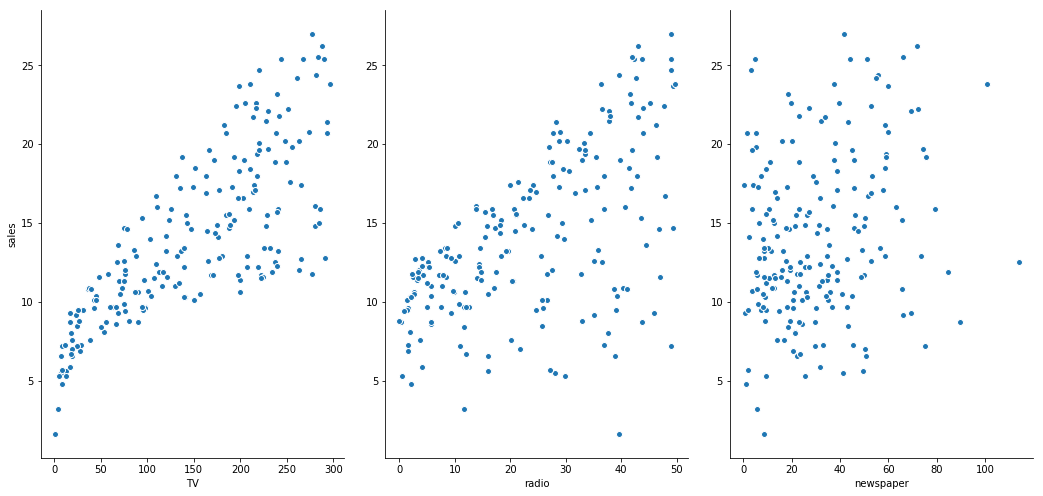

In [ ]:
#meme chose mais avec seaborn
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7)

# Tracé des correlations entre les différents descripteurs et cible

In [ ]:
On utilise ici seaborn pour avoir la matrice des correlations

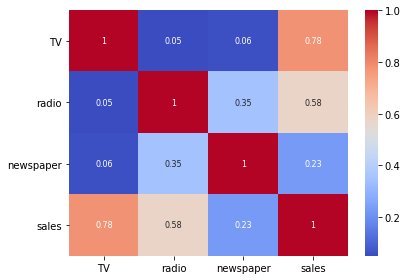

In [ ]:
import seaborn as sns
#We can visualise the correlation between all the variables in the dataset using a heatmap in Seaborn
sns.heatmap(data=df.corr().round(2), cmap='coolwarm', annot=True, annot_kws={"size":8})
plt.tight_layout()
plt.show()

On confirme qu'il n'y a pas vraiment de dépendance entre les descripteurs.

# Développement du modele linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
cols_predicteurs = ['TV','radio','newspaper']
#predicteurs
X = df[cols_predicteurs]
y = df.sales


In [ ]:
#Effectuer la séparation Training-Test
from sklearn import cross_validation
 
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y , test_size = 0.2)
#detail de chacun des sous-dataset
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(160, 3) (160,)
(40, 3) (40,)


In [ ]:
#estimation des coeeficients du modele lineaire
lm = LinearRegression()
lm.fit(X_train,y_train)
#Afficher les coefficients
print(lm.intercept_)
print(lm.coef_)

2.84725519714
[ 0.04550281  0.1906464  -0.00153084]


In [ ]:
#Afficher l'equation
list(zip(cols_predicteurs, lm.coef_))


[('TV', 0.045502812611957807),
 ('radio', 0.19064639847970086),
 ('newspaper', -0.001530840869561248)]

In [ ]:
# proceder au test
y_pred = lm.predict(X_test)

In [ ]:
#comparer les valeurs test et prédites
test_pred_df = pd.DataFrame( { 'Valeurs test': y_test,
                            'Valeurs prédites': np.round( y_pred, 2),
                            'residuels': y_test - y_pred } )
test_pred_df[0:10]

,Valeurs prédites,Valeurs test,residuels
196,5.27,7.6,2.330271
20,14.08,14.6,0.522971
70,21.04,22.3,1.259997
2,12.30,10.4,-1.895493
116,12.86,12.6,-0.256465
168,13.22,12.2,-1.018900
189,18.51,15.9,-2.605380
162,13.50,13.3,-0.196517
45,8.82,8.5,-0.322703
37,23.33,25.4,2.065386


In [ ]:
import numpy as np
from sklearn import metrics
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#Calcul du R-squared
r2 = metrics.r2_score(y_test, y_pred)
print(r2)

1.58222520847
0.920428820838


# K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
cv_scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
print(cv_scores)

[ 0.90396895  0.91961862  0.93387867  0.82871775  0.92760819  0.87340727
  0.72511701  0.91191345  0.92997975  0.69327478]


In [ ]:
#calcul du scores
print(np.round(np.mean(cv_scores), 2))

0.86


# Selectionner les meilleurs prédicteurs

* on utilise p-value

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
model =SelectKBest(score_func = f_regression, k = 3)# tous les descripteurs pour k
resultats = model.fit(X_train, y_train)

In [ ]:
print(resultats.scores_)

[ 227.96116592   86.52518074    9.28049853]


In [ ]:
print(resultats.pvalues_)

[  1.86796519e-32   1.09404944e-16   2.71489391e-03]


In [ ]:
#afficher pour 4 chiffres après la virgule
[ '{0:5.3f}'.format(p) for p in resultats.pvalues_]

['0.000', '0.000', '0.003']

un predicteur sera significatif si p-val est moins de 5% et la valeur F en devenant plus grande indique une plus grande importance

Par ordre de classement, on voit que c'est TV et radio qui sont de bons candidats pour le modele

# Modele avec seulement TV et radio

In [ ]:
cols_predicteurs = ['TV','radio']
#predicteurs
X = df[cols_predicteurs]
y = df.sales

#Effectuer la séparation Training-Test
from sklearn import cross_validation
 
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y , test_size = 0.2)
#detail de chacun des sous-dataset
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

#estimation des coeeficients du modele lineaire
lm = LinearRegression()
lm.fit(X_train,y_train)
#Afficher les coefficients
print(lm.intercept_)
print(lm.coef_)

#Afficher l'equation
list(zip(cols_predicteurs, lm.coef_))

# proceder au test
y_pred = lm.predict(X_test)

#comparer les valeurs test et prédites
test_pred_df = pd.DataFrame( { 'Valeurs test': y_test,
                            'Valeurs prédites': np.round( y_pred, 2),
                            'residuels': y_test - y_pred } )
print(test_pred_df[0:10])

import numpy as np
from sklearn import metrics
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#Calcul du R-squared
r2 = metrics.r2_score(y_test, y_pred)
print(r2)

(160, 2) (160,)
(40, 2) (40,)
3.06730081558
[ 0.04511622  0.18845459]
     Valeurs prédites  Valeurs test  residuels
123             13.63          11.6  -2.025625
12              17.28          17.4   0.123337
57               8.69           5.5  -3.192223
189             18.59          15.9  -2.690058
85              20.80          21.7   0.896839
25               8.25           9.7   1.447431
78              13.87          14.2   0.325239
86              15.25          15.2  -0.051319
40              20.46          21.5   1.041463
87              11.69          12.0   0.307831
1.92515377471
0.848789057584


In [ ]:
#avec cross-validation
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
cv_scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
print(cv_scores)
#calcul du scores
print(np.round(np.mean(cv_scores), 2))

[ 0.95695701  0.91156256  0.90995801  0.87834904  0.86732074  0.92253902
  0.91527192  0.94017434  0.77121609  0.90158672]
0.9


On voit que le score sous cross validation est legerement mieux qu'avec les 3 predicteurs

In [ ]:
Référence: The Elements of Statistical Learning - Hastie, Tibshirani and Friedman, voir https://web.stanford.edu/~hastie/ElemStatLearn/